# **Testing clustering for 1 person**

# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np 
import os
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

# **DATA LOADING**

In [2]:
base_dir = '/Users/rio/Documents/RIO/Pemrograman/Reasearch/EEG To Text Representation/Dataset/KELAS B'
file_name_to_find = 'UK.log.processed.csv'
all_dataframes = {}

# Iterasi melalui setiap item di dalam direktori 'KELAS B'
for student_folder in os.listdir(base_dir):
    # Buat jalur lengkap ke folder siswa
    student_path = os.path.join(base_dir, student_folder)
    
    # Pastikan item tersebut benar-benar sebuah folder (direktori)
    if os.path.isdir(student_path):
        # Buat jalur lengkap ke file CSV yang dicari
        file_path = os.path.join(student_path, file_name_to_find)
        
        # Periksa apakah file tersebut ada di lokasi yang diharapkan
        if os.path.exists(file_path):
            try:
                # Memuat file CSV ke dalam DataFrame
                df = pd.read_csv(file_path)
                
                # Simpan DataFrame dengan nama folder siswa sebagai kunci (key)
                all_dataframes[student_folder] = df
                
            except Exception as e:
                print(f"Gagal memuat file {file_path}: {e}")
        else:
            print(f"File tidak ditemukan di: {file_path}")

print("\n--- Selesai ---")
print(f"Jumlah DataFrame yang berhasil dimuat: {len(all_dataframes)}")


--- Selesai ---
Jumlah DataFrame yang berhasil dimuat: 28


In [3]:
for i in range(len(all_dataframes)):
    name = f'df_{list(all_dataframes.keys())[i]}' 
    name = name.lower() 
    vars()[name] = all_dataframes[list(all_dataframes.keys())[i]]

In [4]:
print("nama dataframe:")
df_names = []
for i in range(len(all_dataframes)):
    name = f'df_{list(all_dataframes.keys())[i]}'
    name = name.lower()
    df_names.append(name)
print(df_names)

nama dataframe:
['df_zhaf', 'df_salsabila', 'df_dian', 'df_alif', 'df_lathan', 'df_aditya', 'df_fandi', 'df_rajendra', 'df_naufal', 'df_nafisa', 'df_amanda', 'df_juan', 'df_challysta', 'df_m.a. zaidan', 'df_decka', 'df_ade', 'df_coanna', 'df_kaysan', 'df_muhammad irvan', 'df_muhammad bilal', 'df_yudya', 'df_naysilla', 'df_muhammad rayya', 'df_claudia', 'df_adriano', 'df_riffat', 'df_viqih', 'df_putrawan']


# **Testing for one subject [df_ZHAF]**

# **DATA EXPLORATION**

In [5]:
df_zhaf.head()

,'Time','VidTime','Signal Level','Blink','Attention','Meditation','Zone','Delta','Theta','Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','Mid Gamma',Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,27:58.0,00:00.0,100,1,75,67,71,35980,69386,8785,13968,22866,8957,4066,2257,NaN,18777.79012,15543.7037,6638.888889,2997.466667
1,27:59.0,00:00.0,100,1,64,66,65,9688,72371,71330,15406,17631,8573,4230,6028,NaN,NaN,NaN,NaN,NaN
2,28:00.0,00:00.0,100,1,48,64,56,56530,60954,8036,23960,9868,6986,7116,2513,NaN,NaN,NaN,NaN,NaN
3,28:01.0,00:00.0,100,1,34,60,47,343690,60844,16817,22019,27833,10241,8819,5716,NaN,NaN,NaN,NaN,NaN
4,28:02.0,00:00.0,100,1,35,74,54,19636,24215,25690,30820,31757,8392,9153,3146,NaN,NaN,NaN,NaN,NaN


In [6]:
df_zhaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   'Time'          405 non-null    object 
 1   'VidTime'       405 non-null    object 
 2   'Signal Level'  405 non-null    int64  
 3   'Blink'         405 non-null    int64  
 4   'Attention'     405 non-null    int64  
 5   'Meditation'    405 non-null    int64  
 6   'Zone'          405 non-null    int64  
 7   'Delta'         405 non-null    int64  
 8   'Theta'         405 non-null    int64  
 9   'Low Alpha'     405 non-null    int64  
 10  'High Alpha'    405 non-null    int64  
 11  'Low Beta'      405 non-null    int64  
 12  'High Beta'     405 non-null    int64  
 13  'Low Gamma'     405 non-null    int64  
 14  'Mid Gamma'     405 non-null    int64  
 15  Unnamed: 15     0 non-null      float64
 16  Unnamed: 16     1 non-null      float64
 17  Unnamed: 17     1 non-null      flo

In [7]:
df_zhaf.describe()

,'Signal Level','Blink','Attention','Meditation','Zone','Delta','Theta','Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','Mid Gamma',Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,405.0,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,0.0,1.00000,1.0000,1.000000,1.000000
mean,100.0,1.733333,50.590123,61.032099,55.548148,2.236311e+05,67190.676543,26170.743210,21063.800000,18777.790123,15543.703704,6638.888889,2997.466667,NaN,18777.79012,15543.7037,6638.888889,2997.466667
std,0.0,0.515118,18.100241,16.093676,13.757294,4.099749e+05,81079.815766,24785.491925,15536.428338,11489.235307,9696.532023,6020.044762,2707.714467,NaN,NaN,NaN,NaN,NaN
min,100.0,1.000000,1.000000,11.000000,14.000000,1.556000e+03,2361.000000,492.000000,460.000000,1607.000000,1058.000000,456.000000,239.000000,NaN,18777.79012,15543.7037,6638.888889,2997.466667
25%,100.0,1.000000,40.000000,53.000000,48.000000,1.963600e+04,25554.000000,10351.000000,9709.000000,11124.000000,9336.000000,3414.000000,1431.000000,NaN,18777.79012,15543.7037,6638.888889,2997.466667
50%,100.0,2.000000,53.000000,61.000000,57.000000,4.393000e+04,44488.000000,19265.000000,17731.000000,16398.000000,13590.000000,5127.000000,2118.000000,NaN,18777.79012,15543.7037,6638.888889,2997.466667
75%,100.0,2.000000,63.000000,70.000000,65.000000,2.470800e+05,75889.000000,35174.000000,27951.000000,23414.000000,18589.000000,7825.000000,3533.000000,NaN,18777.79012,15543.7037,6638.888889,2997.466667
max,100.0,5.000000,96.000000,97.000000,84.000000,2.369076e+06,689965.000000,228820.000000,98516.000000,78127.000000,88847.000000,69414.000000,19641.000000,NaN,18777.79012,15543.7037,6638.888889,2997.466667


# **DATA CLEANING**

In [8]:
# if there are missing values, handle them

# Smooth setiap band frekuensi menggunakan Savitzky-Golay filter
def handle_missing_value(df):
    for band in ['Delta','Theta','Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','Mid Gamma']:
        df[band] = savgol_filter(df[band], window_length=11, polyorder=2)
    return df

# **FULL CODE**

In [ ]:
# Load data
raw_df = df_zhaf

bands = ['Delta','Theta','Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','Mid Gamma']

# Clean column names (remove quotes and extra spaces)
raw_df.columns = [col.strip().replace("'", "") for col in raw_df.columns]

for i in raw_df.columns:
    if i in ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']:
        raw_df.drop(columns=i, inplace=True)

print(f"✅ Data loaded successfully. Shape: {raw_df.shape}")
print("\nFirst 2 rows of raw ")
display(raw_df.head(2).T)

# Convert Time to datetime and extract seconds
raw_df['Time'] = pd.to_datetime(raw_df['Time'], format='%M:%S.%f', errors='coerce')
raw_df['seconds'] = raw_df['Time'].dt.minute * 60 + raw_df['Time'].dt.second

# Handle missing values
missing_before = raw_df.isnull().sum().sum()
raw_df = handle_missing_value(raw_df)
missing_after = raw_df.isnull().sum().sum()

print(f"\nMissing values before cleaning: {missing_before}")
print(f"Missing values after cleaning: {missing_after}")

# Normalize raw band powers using robust scaling (less sensitive to outliers)
scaler = RobustScaler()
raw_df[[f'{band}_norm' for band in bands]] = scaler.fit_transform(raw_df[bands])

print("\n✅ Data preprocessing complete")
print(f"Final dataset shape: {raw_df.shape}")
print("\nData types after preprocessing:")
display(raw_df.dtypes)

✅ Data loaded successfully. Shape: (405, 15)

First 2 rows of raw 


,0,1
'Time',27:58.0,27:59.0
'VidTime',00:00.0,00:00.0
'Signal Level',100,100
'Blink',1,1
'Attention',75,64
'Meditation',67,66
'Zone',71,65
'Delta',35980,9688
'Theta',69386,72371
'Low Alpha',8785,71330



Missing values before cleaning: 0
Missing values after cleaning: 0

✅ Data preprocessing complete
Final dataset shape: (405, 24)

Data types after preprocessing:


Time               datetime64[ns]
VidTime                    object
Signal Level                int64
Blink                       int64
Attention                   int64
Meditation                  int64
Zone                        int64
Delta                     float64
Theta                     float64
Low Alpha                 float64
High Alpha                float64
Low Beta                  float64
High Beta                 float64
Low Gamma                 float64
Mid Gamma                 float64
seconds                     int32
Delta_norm                float64
Theta_norm                float64
Low Alpha_norm            float64
High Alpha_norm           float64
Low Beta_norm             float64
High Beta_norm            float64
Low Gamma_norm            float64
Mid Gamma_norm            float64
dtype: object

In [11]:
# Parameters
SEGMENT_DURATION = 15  # seconds
SAMPLING_RATE = 1      # Assuming 1 sample per second based on data
SUBJECT_ID = "subject_1"  # In real data, you'd have multiple subjects

# Add subject identifier (for demo, we use one subject; in real data you'd have 80 subjects)
raw_df['subject_id'] = SUBJECT_ID

# Verify data continuity
time_diffs = raw_df['seconds'].diff().fillna(0)
discontinuities = np.where(time_diffs > 1)[0]
print(f"Number of time discontinuities: {len(discontinuities)}")
if len(discontinuities) > 0:
    print(f"First discontinuity at index {discontinuities[0]}: gap of {time_diffs.iloc[discontinuities[0]]} seconds")

# Segment the data
segments = []
segment_ids = []

# Get the time range
start_time = raw_df['seconds'].min()
end_time = raw_df['seconds'].max()
print(f"\nTime range: {start_time} to {end_time} seconds")

# Create segments
current_time = start_time
segment_counter = 0

while current_time + SEGMENT_DURATION <= end_time:
    # Filter data for current segment
    segment_data = raw_df[
        (raw_df['seconds'] >= current_time) & 
        (raw_df['seconds'] < current_time + SEGMENT_DURATION)
    ].copy()
    
    # Skip if segment has insufficient data points
    if len(segment_data) < SEGMENT_DURATION * 0.8:  # Allow 20% missing
        print(f"Skipping segment starting at {current_time}s - insufficient data ({len(segment_data)} points)")
        current_time += SEGMENT_DURATION
        continue
    
    # Add segment metadata
    segment_data['segment_id'] = segment_counter
    segment_data['segment_start'] = current_time
    
    segments.append(segment_data)
    segment_ids.append(segment_counter)
    
    # Move to next segment
    current_time += SEGMENT_DURATION
    segment_counter += 1

print(f"\n✅ Created {len(segments)} segments of {SEGMENT_DURATION} seconds each")
print(f"Total segments: {len(segments)}")
print(f"Total data points: {sum(len(seg) for seg in segments)}")

# Combine segments into single dataframe
segmented_df = pd.concat(segments, ignore_index=True)

Number of time discontinuities: 5
First discontinuity at index 238: gap of 3.0 seconds

Time range: 1678 to 2094 seconds
Skipping segment starting at 1918s - insufficient data (8 points)

✅ Created 26 segments of 15 seconds each
Total segments: 26
Total data points: 385



Segment length statistics:
Min length: 12 samples
Max length: 15 samples
Mean length: 14.8 samples


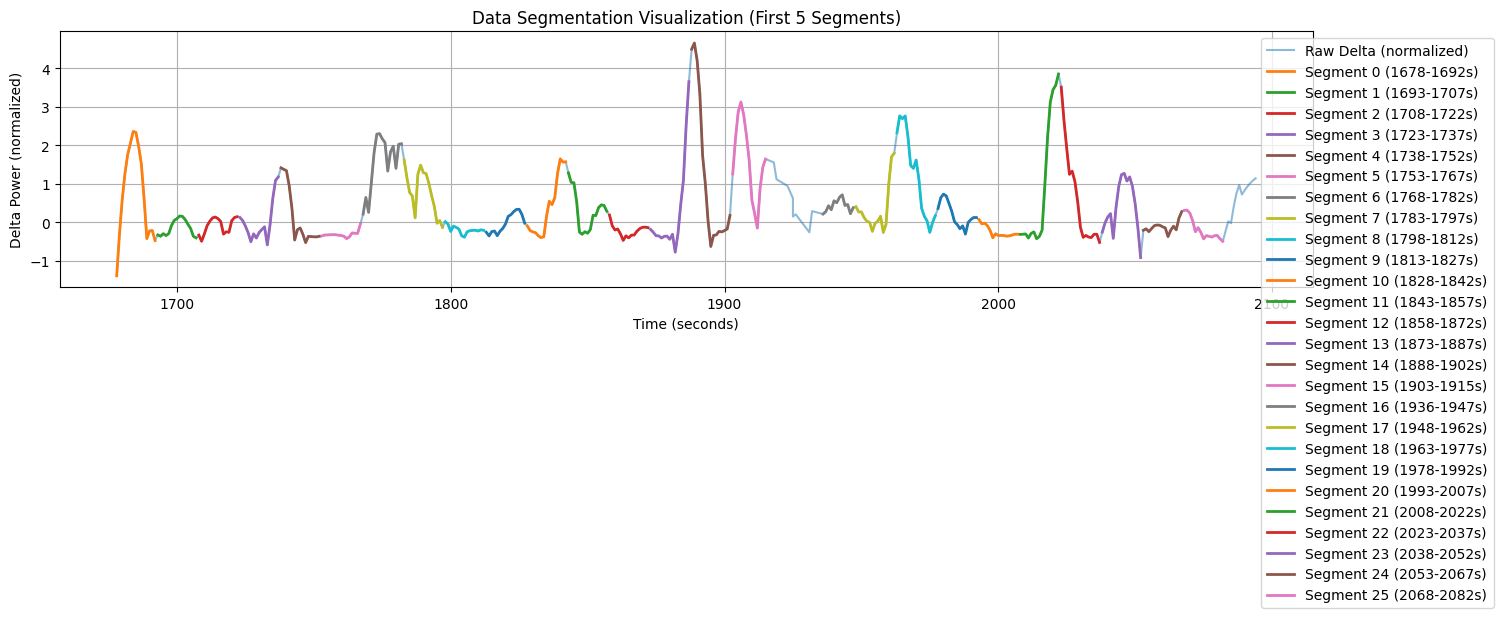

In [12]:
# Verify segmentation
segment_lengths = segmented_df.groupby('segment_id').size()
print("\nSegment length statistics:")
print(f"Min length: {segment_lengths.min()} samples")
print(f"Max length: {segment_lengths.max()} samples")
print(f"Mean length: {segment_lengths.mean():.1f} samples")

# Visualize segmentation
plt.figure(figsize=(15, 5))
plt.plot(raw_df['seconds'], raw_df['Delta_norm'], alpha=0.5, label='Raw Delta (normalized)')
for seg_id in segment_ids[:]:  # Show first 5 segments
    seg_data = segmented_df[segmented_df['segment_id'] == seg_id]
    plt.plot(seg_data['seconds'], seg_data['Delta_norm'], linewidth=2, 
             label=f'Segment {seg_id} ({seg_data["seconds"].min():.0f}-{seg_data["seconds"].max():.0f}s)')
plt.xlabel('Time (seconds)')
plt.ylabel('Delta Power (normalized)')
plt.title('Data Segmentation Visualization (First 5 Segments)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Extracting temporal features with fixed length (15 windows)...


100%|██████████| 26/26 [00:00<00:00, 2481.10it/s]


✅ Features extracted for 26 segments
Feature shape per segment: (15, 8)


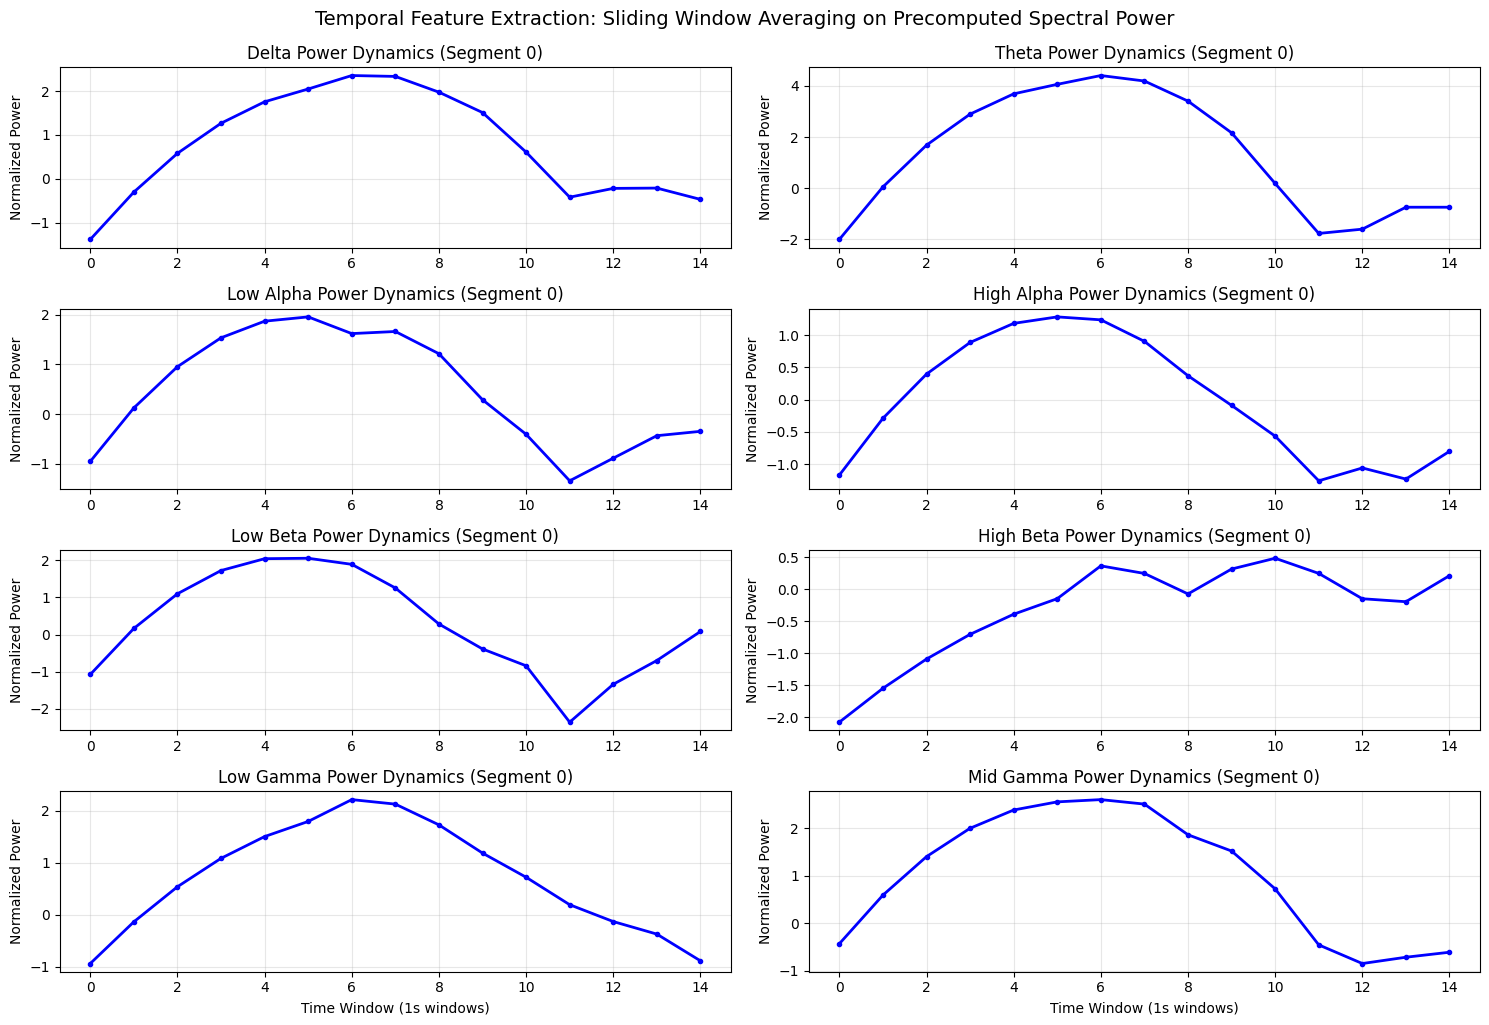

In [13]:
def extract_temporal_features(segment_data, target_length=15):
    """
    Ekstrak fitur temporal dari data EEG yang sudah berupa spectral power per band.
    Tidak menggunakan FFT/Welch karena data input sudah berupa daya spektral.
    Output selalu (target_length, n_bands) untuk kompatibilitas clustering.
    """
    band_columns = [
        'Delta_norm', 'Theta_norm', 'Low Alpha_norm',
        'High Alpha_norm', 'Low Beta_norm', 'High Beta_norm',
        'Low Gamma_norm', 'Mid Gamma_norm'
    ]

    for col in band_columns:
        if col not in segment_data.columns:
            raise KeyError(f"Kolom {col} tidak ditemukan. Pastikan normalisasi telah dijalankan.")

    signal_matrix = segment_data[band_columns].values  # shape: (n_actual, 8)

    # Seragamkan panjang
    n_actual = signal_matrix.shape[0]
    if n_actual < target_length:
        pad_width = target_length - n_actual
        signal_matrix = np.pad(signal_matrix, ((0, pad_width), (0, 0)), mode='edge')
    elif n_actual > target_length:
        signal_matrix = signal_matrix[:target_length]

    return signal_matrix  # Selalu (15, 8)


# Ekstrak fitur untuk semua segmen
segment_features = {}
feature_shapes = []

print("Extracting temporal features with fixed length (15 windows)...")
for seg_id, group in tqdm(segmented_df.groupby('segment_id'), total=len(segment_ids)):
    # Hapus duplikat sebelum ekstraksi
    group = group.sort_values('seconds').drop_duplicates(subset='seconds', keep='first')
    features = extract_temporal_features(group, target_length=15)
    if features is not None and features.shape[0] == 15:
        segment_features[seg_id] = features
        feature_shapes.append(features.shape)
    else:
        print(f"⚠️ Warning: Invalid shape for segment {seg_id}")

print(f"\n✅ Features extracted for {len(segment_features)} segments")
if feature_shapes:
    print(f"Feature shape per segment: {feature_shapes[0]}")
else:
    print("❌ No valid features extracted.")


# Visualisasi hasil ekstraksi fitur untuk segmen pertama
if segment_features:
    first_seg_id = next(iter(segment_features))
    first_features = segment_features[first_seg_id]
    
    plt.figure(figsize=(15, 10))
    bands = ['Delta', 'Theta', 'Low Alpha', 'High Alpha', 'Low Beta', 'High Beta', 'Low Gamma', 'Mid Gamma']
    
    for i, band in enumerate(bands):
        plt.subplot(4, 2, i + 1)
        plt.plot(first_features[:, i], 'b-', linewidth=2, marker='o', markersize=3)
        plt.title(f'{band} Power Dynamics (Segment {first_seg_id})', fontsize=12)
        plt.ylabel('Normalized Power')
        plt.grid(True, alpha=0.3)
        if i >= 6:  # Last two bands
            plt.xlabel('Time Window (1s windows)')
    
    plt.tight_layout()
    plt.suptitle('Temporal Feature Extraction: Sliding Window Averaging on Precomputed Spectral Power', y=1.02, fontsize=14)
    plt.show()


# Siapkan daftar fitur untuk clustering
# feature_list = [segment_features[seg_id] for seg_id in sorted(segment_features.keys())]
# print("\n✅ Feature extraction complete. Ready for clustering.")

Clustering 26 segmen EEG dengan DTW...
Dimensi fitur per segmen: (15, 8)
✅ Clustering intra-subjek selesai
Jumlah segmen: 26
Jumlah cluster: 4


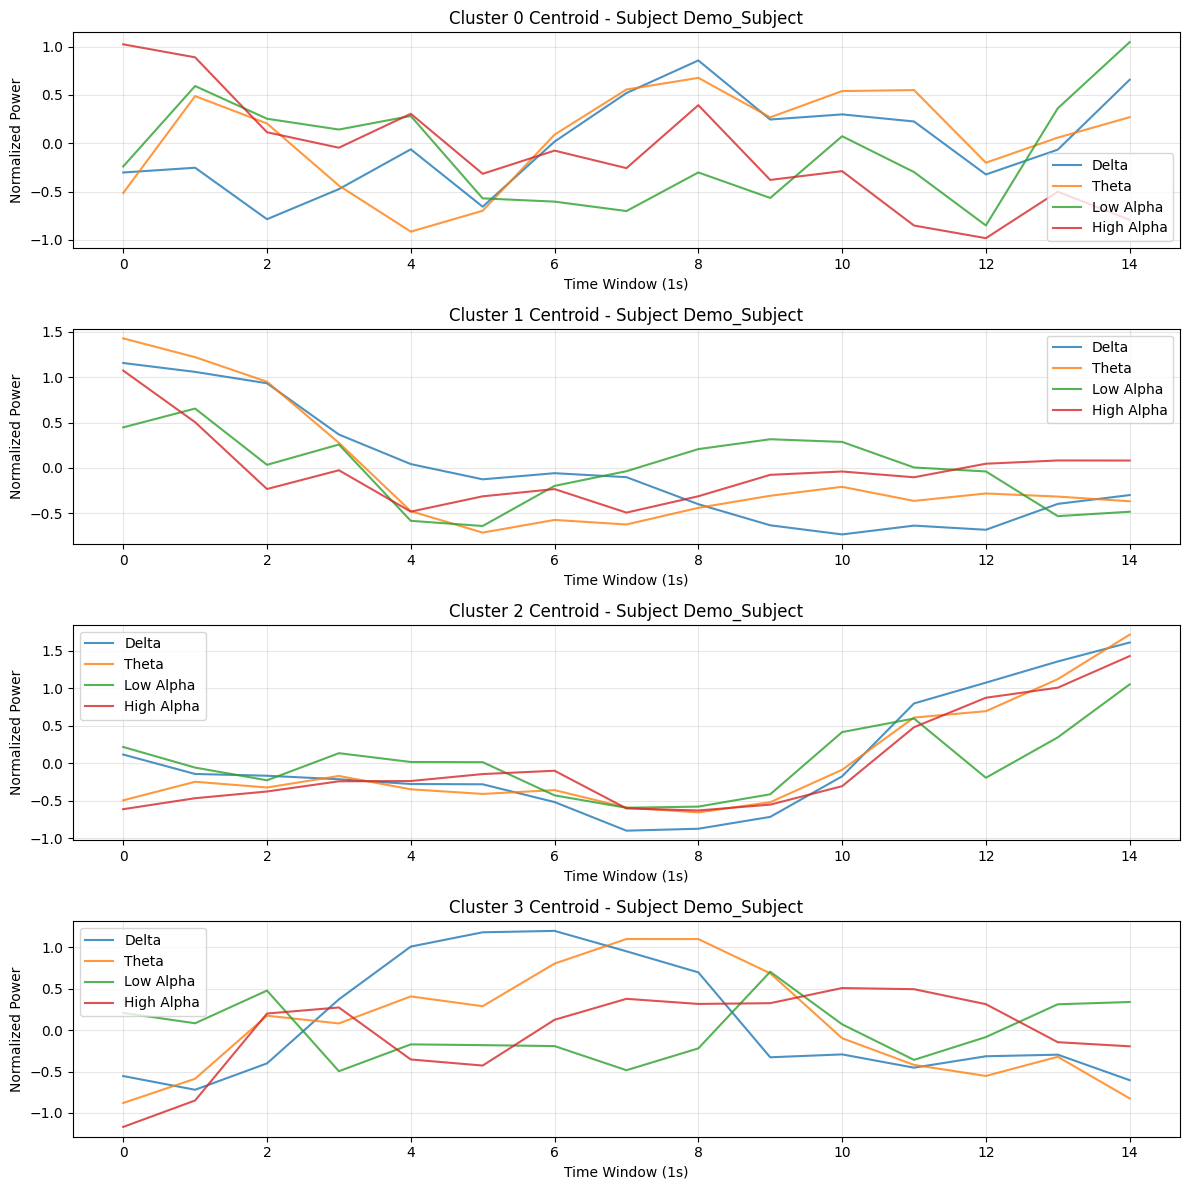


Distribusi cluster untuk Subject Demo_Subject:
  Cluster 0: 4 segmen (15.4%)
  Cluster 1: 10 segmen (38.5%)
  Cluster 2: 7 segmen (26.9%)
  Cluster 3: 5 segmen (19.2%)
Silhouette Score: 0.06746373995182227


In [14]:
def perform_intra_subject_clustering(segment_features_dict, n_clusters=4, random_state=42):
    """
    Fungsi untuk melakukan clustering pada data 1 subjek EEG.
    
    Parameters:
    -----------
    segment_features_dict : dict
        Dictionary dengan format:
        {segment_id: array(n_windows, n_bands), ...}
        Output dari extract_temporal_features()
    n_clusters : int
        Jumlah cluster per subjek (misal: 4 state kognitif)
    random_state : int
        Untuk reproducibility
    
    Returns:
    --------
    results : dict
        - 'segment_labels': {seg_id: cluster_label}
        - 'cluster_centroids': array(n_clusters, n_windows, n_bands)
        - 'silhouette_score': float (jika > 1 cluster)
        - 'model': fitted clustering model
    """
    if not segment_features_dict:
        raise ValueError("segment_features_dict kosong. Pastikan ekstraksi fitur berhasil.")
    
    # Siapkan data untuk clustering
    feature_list = []
    segment_ids = []
    
    for seg_id, features in segment_features_dict.items():
        if features is not None and features.shape[0] > 0:
            feature_list.append(features)  # shape: (n_windows, n_bands)
            segment_ids.append(seg_id)
    
    if not feature_list:
        raise ValueError("Tidak ada fitur valid untuk clustering.")
    
    # Gunakan TimeSeriesScaler untuk normalisasi temporal (opsional tapi disarankan)
    
    # Stack semua segment sebagai time series
    X = feature_list  # List of (n_windows, n_bands)
    
    # Normalisasi: penting untuk DTW agar skala antar band seimbang
    scaler_ts = TimeSeriesScalerMeanVariance()
    X_scaled = scaler_ts.fit_transform(X)
    
    print(f"Clustering {len(X_scaled)} segmen EEG dengan DTW...")
    print(f"Dimensi fitur per segmen: {X_scaled[0].shape}")
    
    # Clustering dengan DTW
    model = TimeSeriesKMeans(
        n_clusters=n_clusters,
        metric="dtw",  # Dynamic Time Warping - bagus untuk pola temporal EEG
        max_iter=50,
        random_state=random_state,
        n_jobs=1  # Kurangi beban komputasi
    )
    
    cluster_labels = model.fit_predict(X_scaled)
    
    # Bangun dictionary hasil
    segment_labels = {seg_id: label for seg_id, label in zip(segment_ids, cluster_labels)}
    
    # Hitung silhouette score jika > 1 cluster
    silhouette_avg = None
    if n_clusters > 1:
        
        # Konversi DTW distance matrix ke format yang bisa dihitung silhouette
        X_flat = [ts.reshape(1, -1) for ts in X_scaled]
        X_flat = np.vstack(X_flat)
        # Untuk efisiensi, gunakan sampling jika terlalu besar
        if len(X_flat) > 50:
            indices = np.random.choice(len(X_flat), size=50, replace=False)
            X_sampled = X_flat[indices]
            labels_sampled = cluster_labels[indices]
            try:
                silhouette_avg = silhouette_score(X_sampled, labels_sampled, metric='euclidean')
            except:
                silhouette_avg = "N/A (komputasi terlalu mahal)"
        else:
            try:
                silhouette_avg = silhouette_score(X_flat, cluster_labels, metric='euclidean')
            except:
                silhouette_avg = "N/A"
    
    results = {
        'segment_labels': segment_labels,
        'cluster_centroids': model.cluster_centers_,  # shape: (n_clusters, n_windows, n_bands)
        'silhouette_score': silhouette_avg,
        'model': model,
        'n_segments': len(segment_ids),
        'n_clusters': n_clusters
    }
    
    return results


def visualize_intra_subject_clustering(results, subject_id="Unknown", band_names=None):
    """
    Visualisasi hasil clustering intra-subjek
    """
    if band_names is None:
        band_names = ['Delta', 'Theta', 'Low Alpha', 'High Alpha', 'Low Beta', 'High Beta', 'Low Gamma', 'Mid Gamma']
    
    centroids = results['cluster_centroids']
    n_clusters = centroids.shape[0]
    n_windows = centroids.shape[1]
    n_bands = centroids.shape[2]
    
    # Plot centroid tiap cluster
    fig, axes = plt.subplots(n_clusters, 1, figsize=(12, 3*n_clusters))
    if n_clusters == 1:
        axes = [axes]
    
    for i in range(n_clusters):
        ax = axes[i]
        for j in range(min(4, n_bands)):  # Plot 4 band pertama saja untuk kejelasan
            ax.plot(centroids[i, :, j], label=band_names[j], alpha=0.8)
        ax.set_title(f'Cluster {i} Centroid - Subject {subject_id}')
        ax.set_xlabel('Time Window (1s)')
        ax.set_ylabel('Normalized Power')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tampilkan distribusi cluster
    labels = list(results['segment_labels'].values())
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nDistribusi cluster untuk Subject {subject_id}:")
    for cluster_id, count in zip(unique, counts):
        print(f"  Cluster {cluster_id}: {count} segmen ({count/len(labels)*100:.1f}%)")
    
    print(f"Silhouette Score: {results['silhouette_score']}")


# Contoh penggunaan fungsi (ganti dengan segment_features Anda dari 1 subjek)
# Anda bisa memanggil fungsi ini di setiap subject dataframe
try:
    subject_results = perform_intra_subject_clustering(
        segment_features,  # dari output Cell 4
        n_clusters=4,      # misal: 4 state kognitif
        random_state=42
    )
    
    print("✅ Clustering intra-subjek selesai")
    print(f"Jumlah segmen: {subject_results['n_segments']}")
    print(f"Jumlah cluster: {subject_results['n_clusters']}")
    
    # Visualisasi
    visualize_intra_subject_clustering(subject_results, subject_id="Demo_Subject")
    
except Exception as e:
    print(f"❌ Error dalam clustering: {e}")
    print("Pastikan segment_features tidak kosong dan berisi array numpy yang valid.")


# Simpan hasil untuk digunakan di pipeline selanjutnya
subject_cluster_labels = subject_results['segment_labels']
subject_centroids = subject_results['cluster_centroids']

🔬 Validating clusters with neurophysiological biomarkers...
✅ Menggunakan 4 cluster dari hasil clustering intra-subjek
Silhouette Score: 0.06746373995182227

✅ Biomarkers calculated for all clusters

Biomarker summary:


,cluster_id,theta_beta_ratio,theta_trend,alpha_trend,high_beta_ratio,alpha_power,beta_power
0,0,-0.614,0.0419,-0.1114,0.820,-0.211,-0.101
1,1,-5.583,-0.1026,-0.0597,-0.975,-0.055,0.009
2,2,-0.047,0.1149,0.1472,0.269,-0.016,0.134
3,3,1.562,-0.0146,0.0689,-0.238,-0.014,0.041



🧠 Neurophysiological validation for 4 cognitive states:

Cluster validation results:


,cluster_id,cluster_label,theta_beta_ratio,theta_trend,interpretations
0,0,High Focus,-0.614,0.0419,Low TBR → High Focus; Increasing Theta → Early Mental Fatigue; Strongly Decreasing Alpha → High Visual Engagement; Very High Beta Dominance → Complex Problem Solving
1,1,High Engagement,-5.583,-0.1026,Low TBR → High Focus; Decreasing Theta → Recovery; Strongly Decreasing Alpha → High Visual Engagement
2,2,Mental Fatigue,-0.047,0.1149,Low TBR → High Focus; Strongly Increasing Theta → Progressive Mental Fatigue; Strongly Increasing Alpha → Mental Disengagement
3,3,Low Focus/Distraction,1.562,-0.0146,High TBR → Low Focus/Distraction; Decreasing Theta → Recovery; Strongly Increasing Alpha → Mental Disengagement


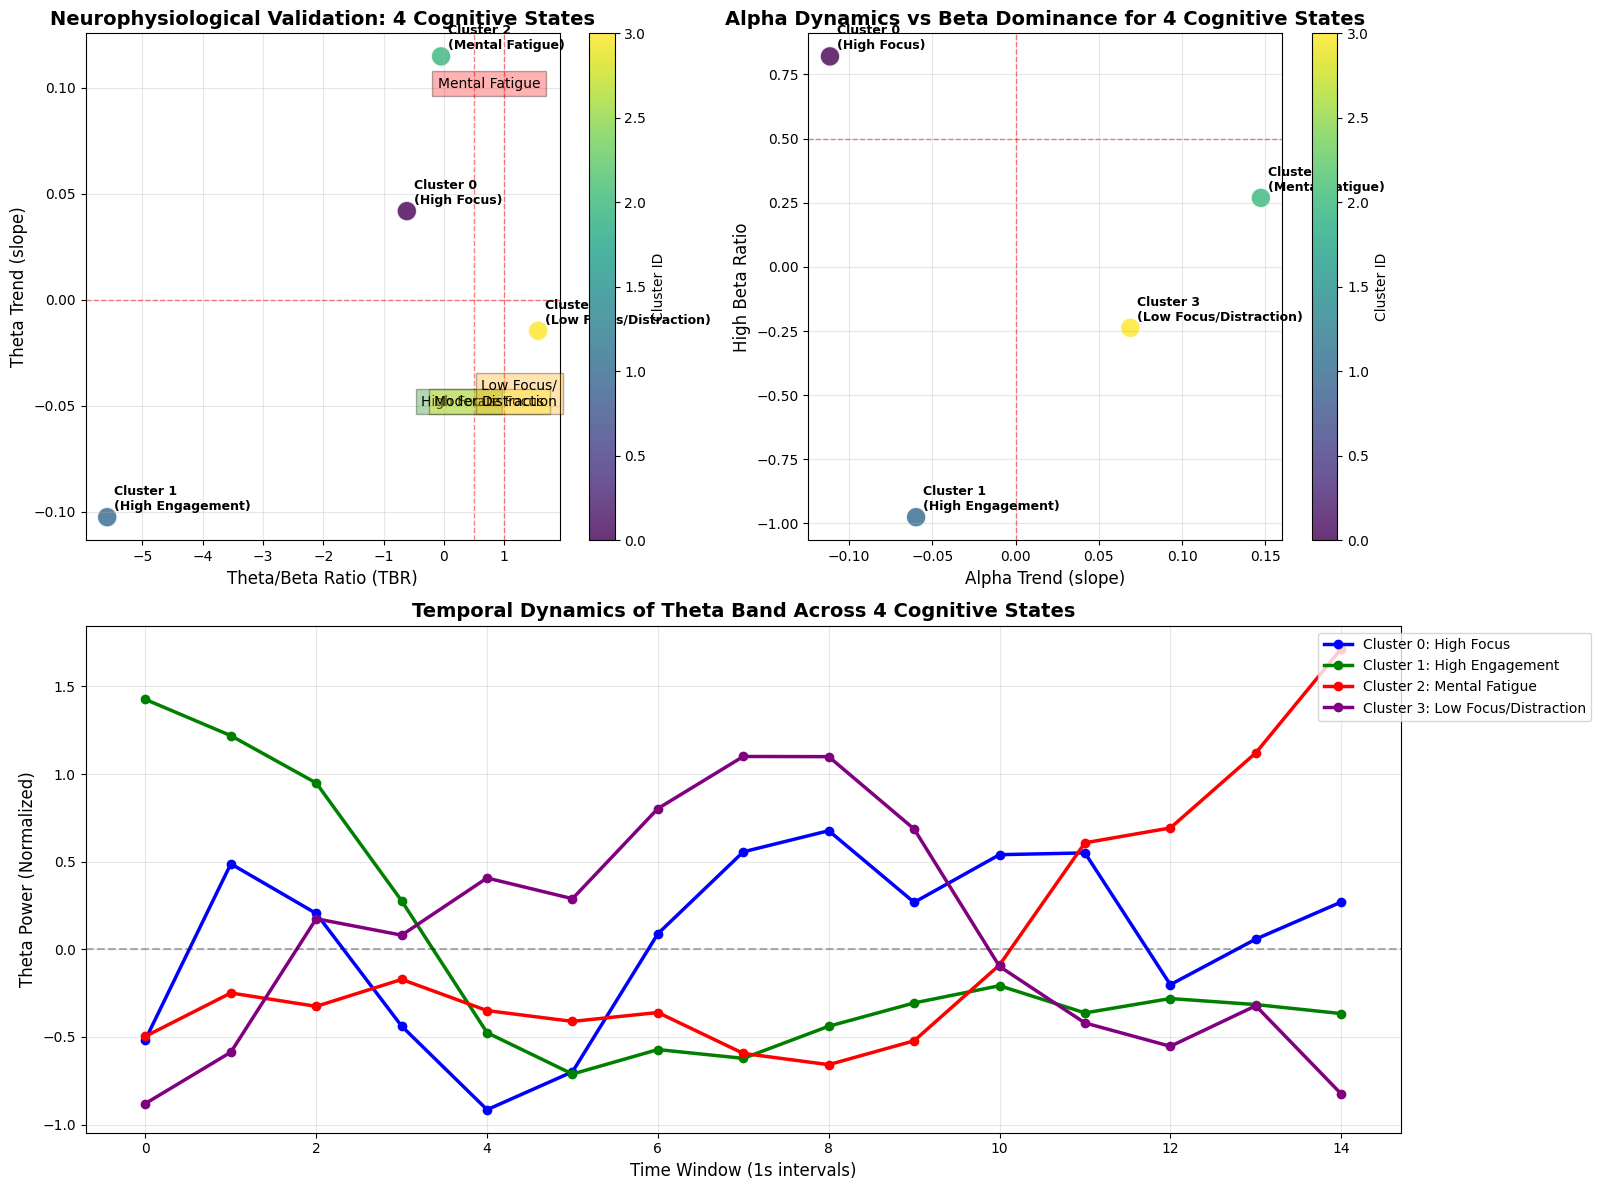


✅ Cluster validation complete
Clusters have been validated against established neurophysiological biomarkers:
  Cluster 0: High Focus
  Cluster 1: High Engagement
  Cluster 2: Mental Fatigue
  Cluster 3: Low Focus/Distraction

💡 Next steps:
1. These validated clusters can be used to label segments in your dataset
2. Create a knowledge base with cluster interpretations for LLM integration
3. Analyze temporal transitions between clusters to understand cognitive dynamics
4. Validate cluster assignments against behavioral data (if available)


In [17]:
print("🔬 Validating clusters with neurophysiological biomarkers...")

# Ambil hasil clustering dari Cell 6
if 'subject_results' not in globals():
    raise ValueError("subject_results tidak ditemukan. Jalankan Cell 6 (clustering) terlebih dahulu.")

cluster_centroids = subject_results['cluster_centroids']  # shape: (n_clusters, n_windows, n_bands)
n_clusters = subject_results['n_clusters']
silhouette_score = subject_results['silhouette_score']

print(f"✅ Menggunakan {n_clusters} cluster dari hasil clustering intra-subjek")
print(f"Silhouette Score: {silhouette_score}")

# Definisikan biomarker neurofisiologis untuk validasi
def calculate_biomarkers(segment_features):
    """
    Hitung biomarker kunci dari fitur temporal EEG
    
    Parameters:
    -----------
    segment_features : np.array
        Shape: (n_timepoints, n_bands) - data per segmen yang sudah dinormalisasi
        
    Returns:
    --------
    biomarkers : dict
        Dictionary berisi biomarker terhitung
    """
    # Pastikan dimensi benar
    if segment_features.ndim != 2 or segment_features.shape[1] != 8:
        raise ValueError(f"Input harus berbentuk (n_timepoints, 8), tapi mendapat {segment_features.shape}")
    
    # Ekstrak daya spektral rata-rata
    delta = np.mean(segment_features[:, 0])
    theta = np.mean(segment_features[:, 1])
    low_alpha = np.mean(segment_features[:, 2])
    high_alpha = np.mean(segment_features[:, 3])
    low_beta = np.mean(segment_features[:, 4])
    high_beta = np.mean(segment_features[:, 5])
    low_gamma = np.mean(segment_features[:, 6])
    mid_gamma = np.mean(segment_features[:, 7])
    
    # Hitung biomarker kunci
    total_beta = low_beta + high_beta + 1e-8  # Hindari pembagian dengan nol
    theta_beta_ratio = theta / total_beta
    alpha_power = low_alpha + high_alpha
    beta_power = total_beta
    gamma_power = low_gamma + mid_gamma
    
    # Hitung tren temporal (slope regresi linear)
    time_points = np.arange(len(segment_features))
    
    # Tren Theta (positif = peningkatan fatigue)
    theta_trend = np.polyfit(time_points, segment_features[:, 1], 1)[0]
    
    # Tren Alpha (perubahan engagement)
    alpha_values = segment_features[:, 2] + segment_features[:, 3]  # Low + High Alpha
    alpha_trend = np.polyfit(time_points, alpha_values, 1)[0]
    
    # Rasio High Beta (kognitif load kompleks)
    high_beta_ratio = high_beta / total_beta
    
    return {
        'theta_beta_ratio': theta_beta_ratio,
        'alpha_power': alpha_power,
        'beta_power': beta_power,
        'gamma_power': gamma_power,
        'theta_trend': theta_trend,
        'alpha_trend': alpha_trend,
        'high_beta_ratio': high_beta_ratio,
        'delta_power': delta,
        'theta_power': theta
    }

# Hitung biomarker untuk setiap centroid cluster
cluster_biomarkers = []

for cluster_id in range(n_clusters):
    centroid = cluster_centroids[cluster_id]  # shape: (n_windows, n_bands)
    biomarkers = calculate_biomarkers(centroid)
    biomarkers['cluster_id'] = cluster_id
    cluster_biomarkers.append(biomarkers)

# Buat DataFrame untuk analisis
biomarker_df = pd.DataFrame(cluster_biomarkers)
print("\n✅ Biomarkers calculated for all clusters")
print("\nBiomarker summary:")

# Tampilkan dalam format yang mudah dibaca
display(biomarker_df[['cluster_id', 'theta_beta_ratio', 'theta_trend', 'alpha_trend', 
                     'high_beta_ratio', 'alpha_power', 'beta_power']].style.format({
    'theta_beta_ratio': '{:.3f}',
    'theta_trend': '{:.4f}',
    'alpha_trend': '{:.4f}',
    'high_beta_ratio': '{:.3f}',
    'alpha_power': '{:.3f}',
    'beta_power': '{:.3f}'
}))

# Validasi terhadap teori neurofisiologis
print("\n🧠 Neurophysiological validation for 4 cognitive states:")
validation_results = []

for idx, row in biomarker_df.iterrows():
    cluster_id = int(row['cluster_id'])
    
    validation = {
        'cluster_id': cluster_id,
        'theta_beta_ratio': row['theta_beta_ratio'],
        'theta_trend': row['theta_trend'],
        'alpha_trend': row['alpha_trend'],
        'high_beta_ratio': row['high_beta_ratio']
    }
    
    # Interpretasi berdasarkan biomarker (untuk 4 state kognitif)
    interpretations = []
    
    # 1. Theta/Beta Ratio (TBR) - biomarker utama fokus
    if row['theta_beta_ratio'] < 0.5:
        interpretations.append("Low TBR → High Focus")
    elif row['theta_beta_ratio'] < 1.0:
        interpretations.append("Medium TBR → Moderate Focus")
    else:
        interpretations.append("High TBR → Low Focus/Distraction")
    
    # 2. Theta Trend - biomarker fatigue
    if row['theta_trend'] > 0.05:  # Threshold empiris untuk kenaikan signifikan
        interpretations.append("Strongly Increasing Theta → Progressive Mental Fatigue")
    elif row['theta_trend'] > 0.01:
        interpretations.append("Increasing Theta → Early Mental Fatigue")
    elif row['theta_trend'] < -0.01:
        interpretations.append("Decreasing Theta → Recovery")
    
    # 3. Alpha Trend - engagement level
    if row['alpha_trend'] < -0.05:
        interpretations.append("Strongly Decreasing Alpha → High Visual Engagement")
    elif row['alpha_trend'] > 0.05:
        interpretations.append("Strongly Increasing Alpha → Mental Disengagement")
    
    # 4. High Beta Ratio - cognitive load
    if row['high_beta_ratio'] > 0.7:
        interpretations.append("Very High Beta Dominance → Complex Problem Solving")
    elif row['high_beta_ratio'] > 0.5:
        interpretations.append("High Beta Dominance → Active Cognitive Processing")
    
    # Penentuan label akhir berdasarkan kombinasi biomarker
    final_label = "Unclassified"
    
    # High Focus: Low TBR + High Beta
    if row['theta_beta_ratio'] < 0.5 and row['high_beta_ratio'] > 0.5:
        final_label = "High Focus"
    # Mental Fatigue: Increasing Theta
    elif row['theta_trend'] > 0.01:
        final_label = "Mental Fatigue"
    # Low Focus/Distraction: High TBR
    elif row['theta_beta_ratio'] > 1.0:
        final_label = "Low Focus/Distraction"
    # Moderate Focus: Kombinasi seimbang
    elif 0.5 <= row['theta_beta_ratio'] <= 1.0:
        final_label = "Moderate Focus"
    # High Engagement: Decreasing Alpha + Moderate TBR
    elif row['alpha_trend'] < -0.03 and row['theta_beta_ratio'] < 0.8:
        final_label = "High Engagement"
    
    # Fallback jika masih unclassified
    if final_label == "Unclassified":
        if row['theta_beta_ratio'] < 0.5:
            final_label = "High Focus"
        elif row['theta_trend'] > 0:
            final_label = "Mental Fatigue"
        elif row['theta_beta_ratio'] > 0.8:
            final_label = "Low Focus/Distraction"
        else:
            final_label = "Moderate Focus"
    
    validation['interpretations'] = "; ".join(interpretations)
    validation['cluster_label'] = final_label
    validation_results.append(validation)

# Buat DataFrame validasi akhir
validation_df = pd.DataFrame(validation_results)
print("\nCluster validation results:")
display(validation_df[['cluster_id', 'cluster_label', 'theta_beta_ratio', 'theta_trend', 
                      'interpretations']].style.format({
    'theta_beta_ratio': '{:.3f}',
    'theta_trend': '{:.4f}'
}))

# Visualisasi validasi biomarker
plt.figure(figsize=(16, 12))

# Plot 1: Theta/Beta Ratio vs Theta Trend (Quadrant Analysis)
plt.subplot(2, 2, 1)
scatter = plt.scatter(
    validation_df['theta_beta_ratio'],
    validation_df['theta_trend'],
    s=200,  # Ukuran tetap untuk kejelasan
    c=validation_df['cluster_id'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='w',
    linewidth=1
)

# Tambahkan garis referensi
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.5, linewidth=1)

# Tambahkan label cluster
for i, row in validation_df.iterrows():
    plt.annotate(f"Cluster {row['cluster_id']}\n({row['cluster_label']})",
                (row['theta_beta_ratio'], row['theta_trend']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.xlabel('Theta/Beta Ratio (TBR)', fontsize=12)
plt.ylabel('Theta Trend (slope)', fontsize=12)
plt.title('Neurophysiological Validation: 4 Cognitive States', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Cluster ID')

# Tambahkan label area yang lebih jelas untuk 4 cluster
plt.text(0.25, -0.05, 'High Focus', fontsize=10, ha='center', 
         bbox=dict(facecolor='green', alpha=0.3))
plt.text(0.75, -0.05, 'Moderate Focus', fontsize=10, ha='center',
         bbox=dict(facecolor='yellow', alpha=0.3))
plt.text(1.25, -0.05, 'Low Focus/\nDistraction', fontsize=10, ha='center',
         bbox=dict(facecolor='orange', alpha=0.3))
plt.text(0.75, 0.1, 'Mental Fatigue', fontsize=10, ha='center',
         bbox=dict(facecolor='red', alpha=0.3))

# Plot 2: Alpha Trend vs High Beta Ratio
plt.subplot(2, 2, 2)
scatter = plt.scatter(
    validation_df['alpha_trend'],
    validation_df['high_beta_ratio'],
    s=200,
    c=validation_df['cluster_id'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='w',
    linewidth=1
)

plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, linewidth=1)

# Tambahkan label cluster
for i, row in validation_df.iterrows():
    plt.annotate(f"Cluster {row['cluster_id']}\n({row['cluster_label']})",
                (row['alpha_trend'], row['high_beta_ratio']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.xlabel('Alpha Trend (slope)', fontsize=12)
plt.ylabel('High Beta Ratio', fontsize=12)
plt.title('Alpha Dynamics vs Beta Dominance for 4 Cognitive States', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Cluster ID')

# Plot 3: Visualisasi centroid temporal
plt.subplot(2, 1, 2)
bands = ['Delta', 'Theta', 'Low Alpha', 'High Alpha', 'Low Beta', 'High Beta', 'Low Gamma', 'Mid Gamma']
colors = ['blue', 'green', 'red', 'purple']  # Warna berbeda untuk setiap cluster

for cluster_id in range(n_clusters):
    centroid = cluster_centroids[cluster_id]
    
    # Plot Theta band untuk visualisasi tren
    plt.plot(centroid[:, 1], 
             label=f'Cluster {cluster_id}: {validation_df.loc[validation_df["cluster_id"] == cluster_id, "cluster_label"].values[0]}',
             color=colors[cluster_id % len(colors)],
             linewidth=2.5,
             marker='o',
             markersize=6)

plt.xlabel('Time Window (1s intervals)', fontsize=12)
plt.ylabel('Theta Power (Normalized)', fontsize=12)
plt.title('Temporal Dynamics of Theta Band Across 4 Cognitive States', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Simpan hasil validasi untuk pipeline selanjutnya
cluster_validation = {
    'validation_df': validation_df,
    'biomarker_df': biomarker_df,
    'cluster_labels': dict(zip(validation_df['cluster_id'], validation_df['cluster_label'])),
    'silhouette_score': silhouette_score,
    'n_clusters': n_clusters
}

print("\n✅ Cluster validation complete")
print("Clusters have been validated against established neurophysiological biomarkers:")
for _, row in validation_df.iterrows():
    print(f"  Cluster {row['cluster_id']}: {row['cluster_label']}")

print("\n💡 Next steps:")
print("1. These validated clusters can be used to label segments in your dataset")
print("2. Create a knowledge base with cluster interpretations for LLM integration")
print("3. Analyze temporal transitions between clusters to understand cognitive dynamics")
print("4. Validate cluster assignments against behavioral data (if available)")

# **RULES REFRENS**